In [ ]:
#import sys
#sys.path.append('D:/v1ktop/Drive/REPOS/augmentation_ap/')

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [3]:
#%matplotlib notebook
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
import numpy as np
from sklearn.decomposition import PCA

In [4]:
! ls drive/My\ Drive/Models

glove.42B.300d.txt


In [ ]:
#glove_dir= r"D:\v1ktop\Drive-INAOE\Models\glove.42B.300d.txt"

In [11]:
glove_dir="drive/My Drive/Models/glove.42B.300d.txt"

In [ ]:
#glove_dir="D:\Models\glove\glove.twitter.27B\glove.twitter.27B.200d.txt"

In [12]:
word2vec_glove_file = get_tmpfile("glove300.txt")
glove2word2vec(glove_dir, word2vec_glove_file)
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [13]:
 %matplotlib inline
def display_pca_scatterplot(model, words=None, sample=0):
  

    word_vectors = np.array([model[w[0]] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    beingsaved = plt.figure(figsize=(6,6), dpi=300)
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x-0.3, y+0.05, word[1])
    beingsaved.savefig("analogia.png", format="png")

In [ ]:
model.most_similar_cosmul(["cry", "frustrated"], ["depressed" ])

[('cries', 0.9592545628547668),
 ('shout', 0.9235686659812927),
 ('yell', 0.9164628386497498),
 ('scream', 0.9146784543991089),
 ('crying', 0.8997381329536438),
 ('screaming', 0.8857455849647522),
 ('angry', 0.8847300410270691),
 ('cried', 0.8803358674049377),
 ('hear', 0.8803219795227051),
 ('complain', 0.8750766515731812)]

In [21]:
model.similar_by_word("morning")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('afternoon', 0.8665474653244019),
 ('evening', 0.7880070209503174),
 ('yesterday', 0.7614548206329346),
 ('sunday', 0.7548924684524536),
 ('night', 0.7457095980644226),
 ('monday', 0.7405094504356384),
 ('friday', 0.7293593287467957),
 ('day', 0.7284514904022217),
 ('saturday', 0.7104398608207703),
 ('thursday', 0.7000478506088257)]

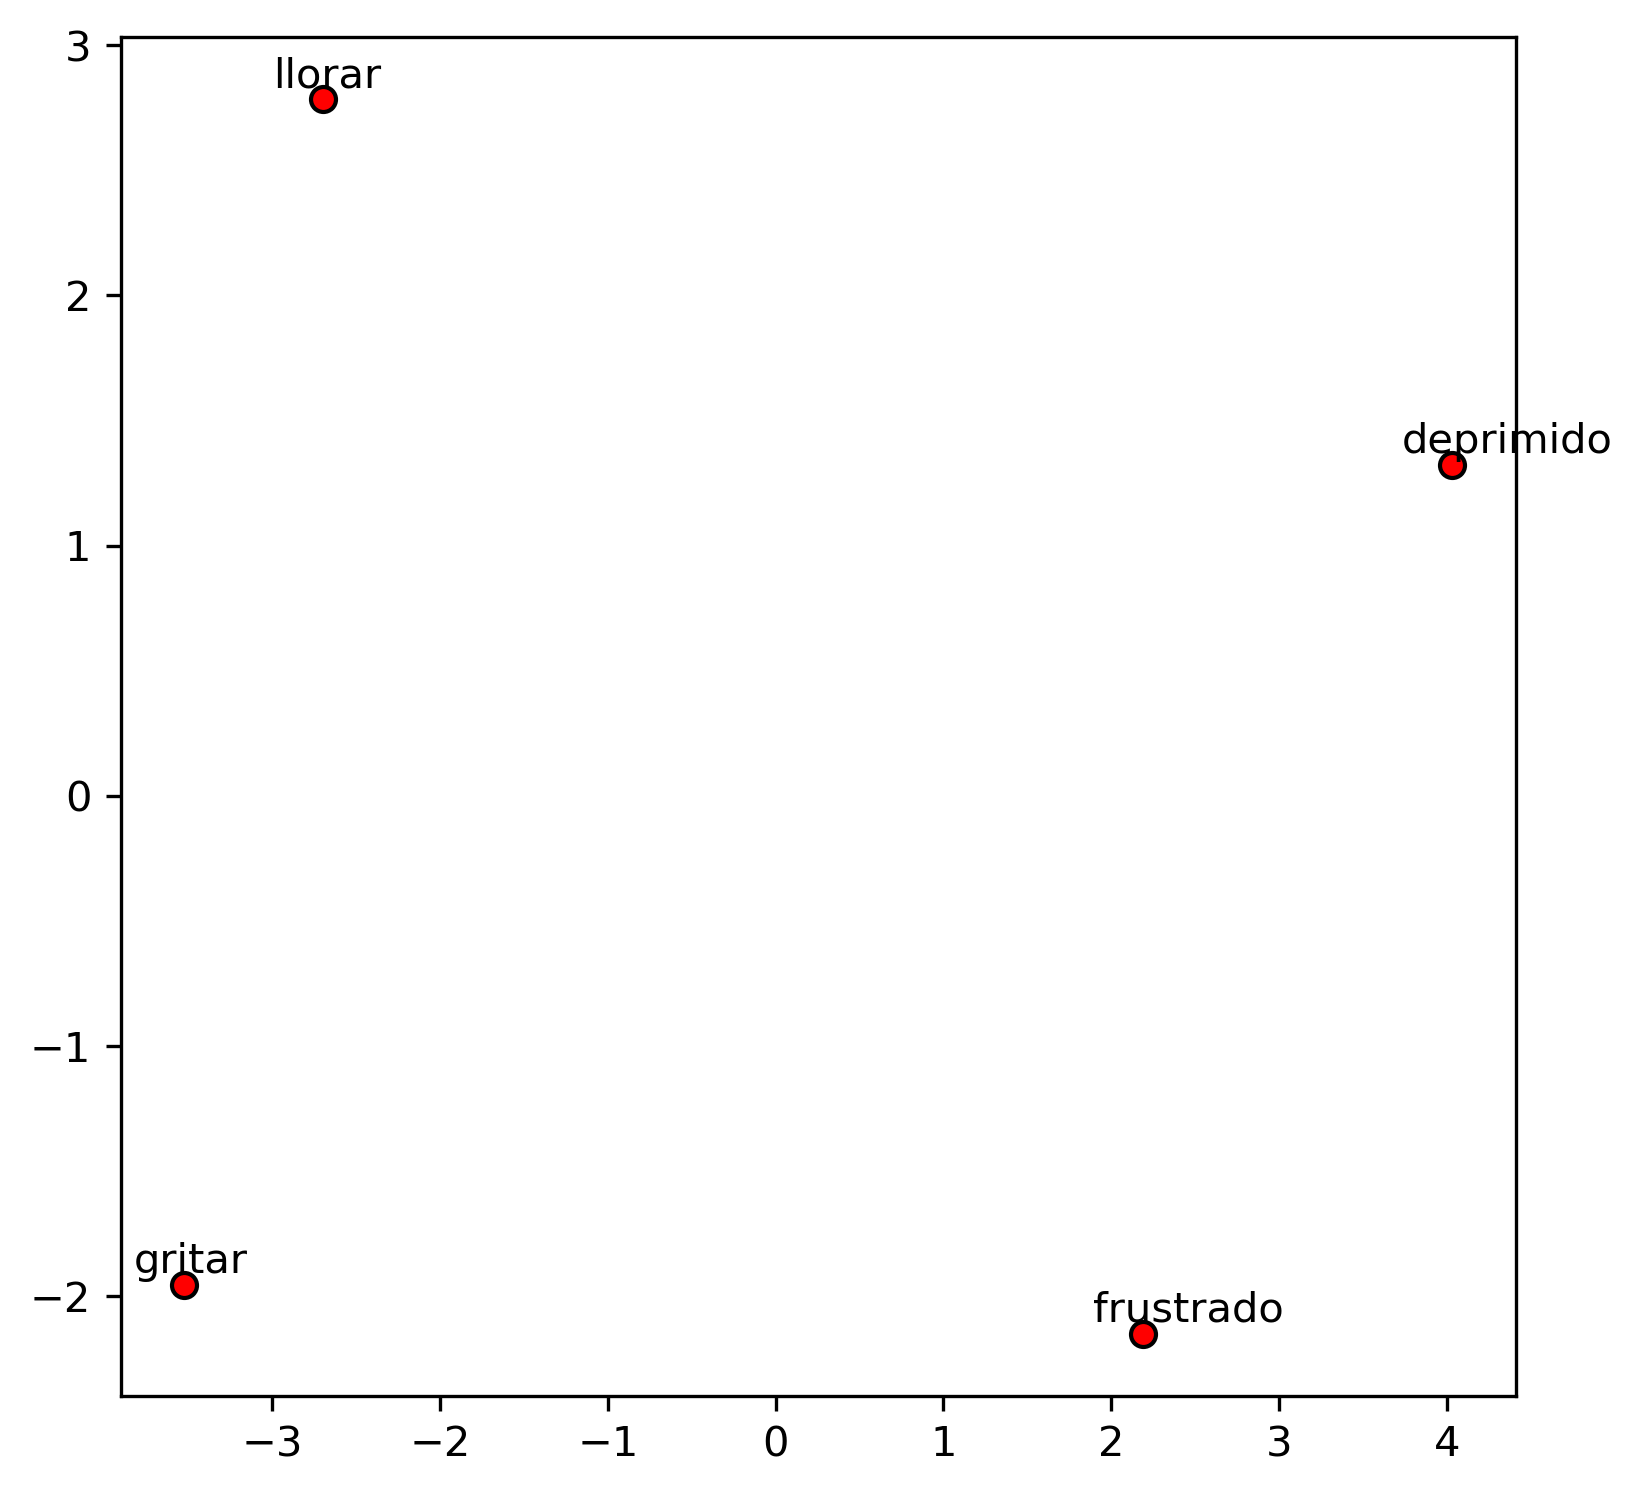

In [ ]:
display_pca_scatterplot(model,[("cry", "llorar"), ("depressed", "deprimido"),
                               ("frustrated", "frustrado"), ("yell", "gritar")])

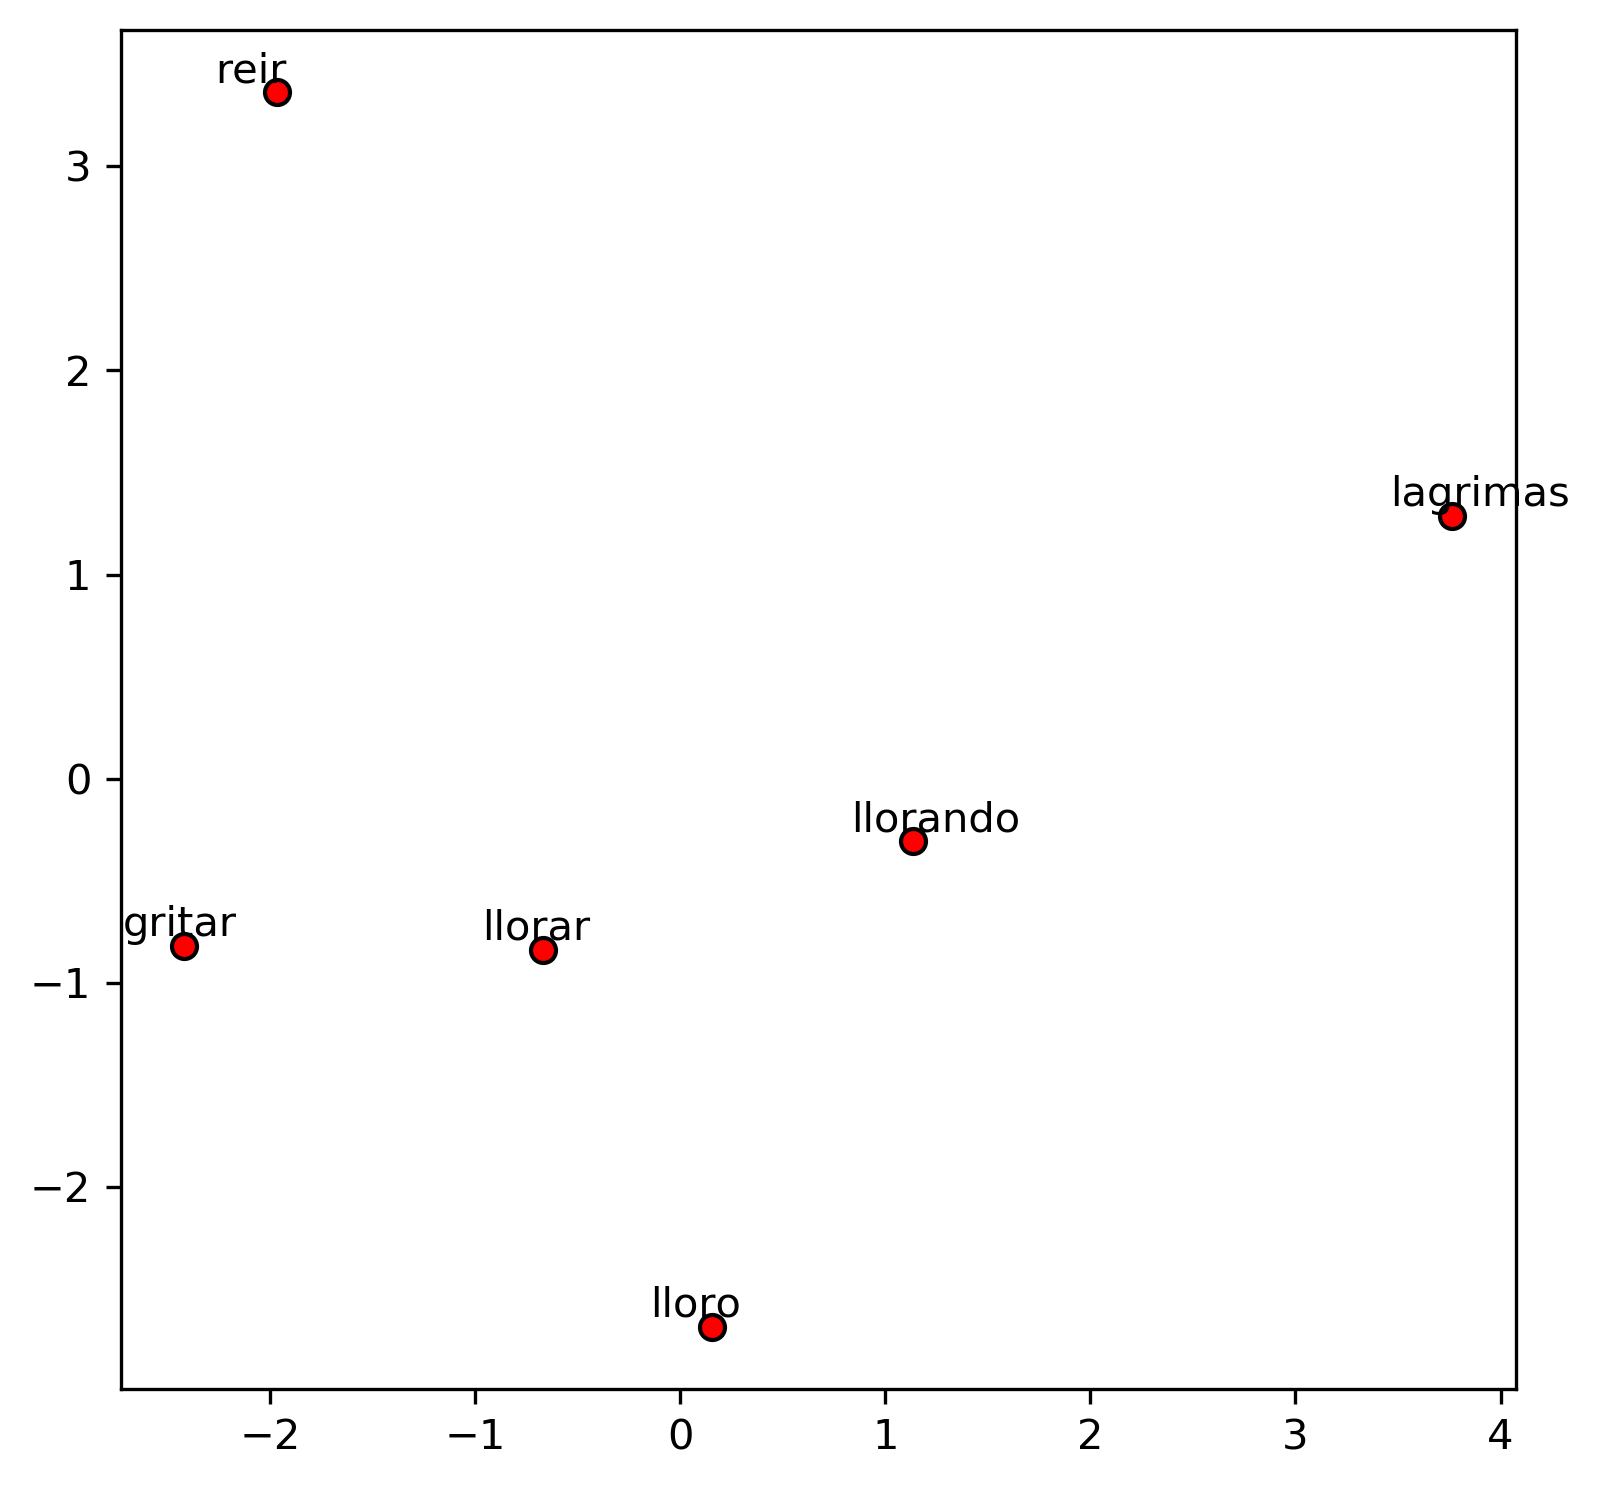

In [ ]:
display_pca_scatterplot(model,[("crying", "llorando"), ("scream", "gritar"), ("cries", "lloro"),
                               ("laugh", "reir"), ("tears", "lagrimas"), ("cry", "llorar")])

In [27]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [28]:
from nltk.corpus import wordnet

In [40]:
wordnet.synsets("clothes")

[Synset('apparel.n.01'),
 Synset('dress.v.02'),
 Synset('invest.v.03'),
 Synset('clothe.v.03')]